In [0]:
#In CNN, Convolution layer-> maxpooling (seq of conv and maxpooling)* -> droput -> flatten -> dense (seq of dense layers)* -> output dense layer 

In [0]:
% matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D
from keras.layers import Dropout, MaxPooling2D, Flatten
from keras.utils import *
import matplotlib.pyplot as plt
import numpy as np

In [0]:
def get_model(x_train,y_train,x_test,y_test):
  
  model = Sequential()                                                                                 # base model
  model.add(Conv2D(64, kernel_size=3, strides=(1, 1), input_shape =(28,28,1), activation ='relu'))     # as the image is in grayscale the shape is 28,28,1 (if rgb = (28,28,3))
                                                                                                       # Conv2D is used for spatial convolution over images, 64 feature maps
  model.add(MaxPooling2D(pool_size = (2,2)))                                                
  model.add(Conv2D(32, (3, 3), strides=(1, 1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.2))                                                                              # 20% probability to reduce overfitting
  model.add(Flatten())                                                                                 # so that can be fed to fully connected layer
  model.add(Dense(128, activation = "relu"))                                                           # Fully connected layer
  model.add(Dense(10, activation = "softmax"))                                                         # Output layer
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  
  print("\n Model Summary \n")
  model.summary()

  print("\n Model Training \n")
  history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size =200, verbose=2) #Training the model (epochs, batch_size = hyperparameters)
                    
  plt.plot(history.history['acc'])                                                                        # summarize history for accuracy
  plt.plot(history.history['val_acc'])
  plt.title('\n Model Accuracy \n')
  plt.ylabel('accuracy') 
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

  plt.plot(history.history['loss'])                                                                       # summarize history for loss
  plt.plot(history.history['val_loss'])
  plt.title('\n Model Loss \n')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  
  return model 

In [0]:
def train_model():
  
  (x_train, y_train), (x_test, y_test) = mnist.load_data()
  x_train = x_train.reshape(60000,28,28,1)                        # reshape to be (batch, rows, cols, channels) to be fed into CNN [ data_format is "channels_last" ] 
  x_test = x_test.reshape(10000,28,28,1)
  x_train = x_train.astype('float32')
  x_test = x_test.astype('float32')
  x_train /= 255                                                  # Grayscale (0-255), convert into [0,1]
  x_test /= 255
  digits = 10
  y_train = to_categorical(y_train,digits)                        # Target values not taken as numerical values; as different items(one-hot encoded vectors)
  y_test = to_categorical(y_test,digits)
  
  model = get_model(x_train,y_train,x_test,y_test)                # Function call for training
  y_test_pred = model.predict(x_test)                             # Testing
  
  print("\n Some Outputs\n")
  for i in range(10):                                             # Print first 10 test images with output classes 
    img = x_test[i].reshape((28,28))
    plt.imshow(img, cmap="Greys")
    plt.show()
    print("Target Value",np.argmax(y_test_pred[i]))
  
  # Final evaluation of the model
  scores = model.evaluate(x_test, y_test, verbose=0)
  print("Large CNN Error: %.2f%%" % (100-scores[1]*100))
  
  return model


 Model Summary 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               102

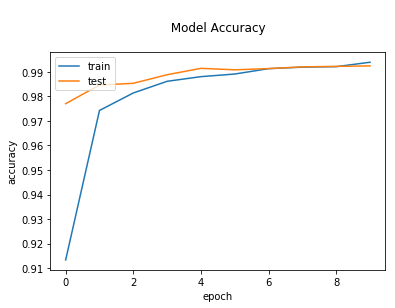

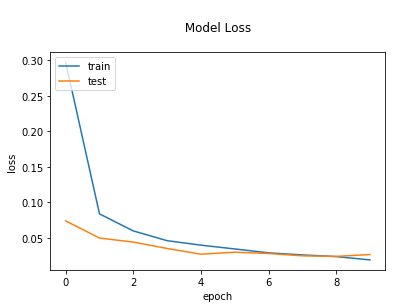


 Some Outputs



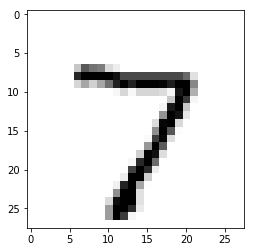

Target Value 7


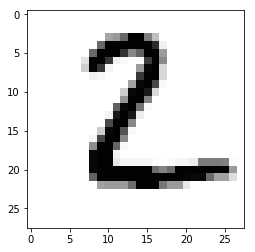

Target Value 2


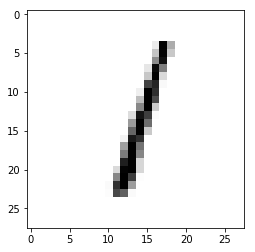

Target Value 1


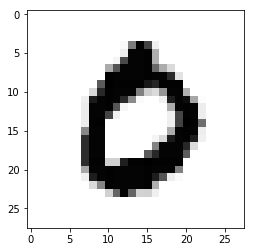

Target Value 0


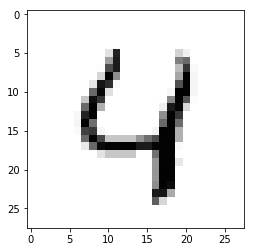

Target Value 4


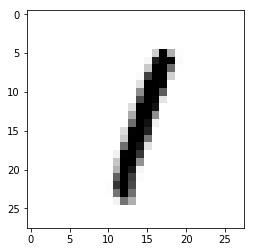

Target Value 1


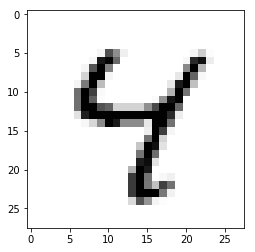

Target Value 4


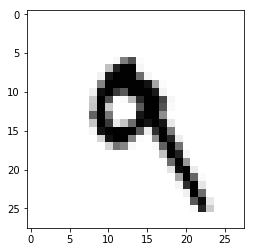

Target Value 9


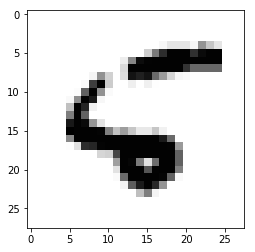

Target Value 5


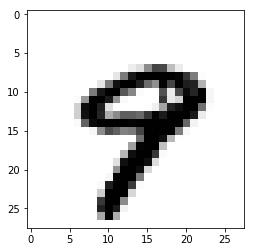

Target Value 9
Large CNN Error: 0.76%


In [0]:
train_model()